# NLP Assignment 4: Similarity of people on wikipedia

In [1]:
import pandas as pd
import numpy as np
import nltk
from scipy.sparse.linalg import svds
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
people = pd.read_csv('10k-people-raw.csv', sep=';')
people

,URL,Name,text
0,https://de.wikipedia.org/wiki/Wallenstein,Wallenstein,"Wallenstein, eigentlich Albrecht Wenzel Eusebi..."
1,https://de.wikipedia.org/wiki/Theobald_von_Bet...,Theobald von Bethmann Hollweg,Theobald Theodor Friedrich Alfred von Bethmann...
2,https://de.wikipedia.org/wiki/Benjamin_Franklin,Benjamin Franklin,Benjamin Franklin (* 17. Januar 1706 in Boston...
3,https://de.wikipedia.org/wiki/Michael_Schumacher,Michael Schumacher,Vorlage:Infobox Formel-1-Fahrer/Wartung/Alte P...
4,https://de.wikipedia.org/wiki/Florence_Nightin...,Florence Nightingale,Florence Nightingale (* 12. Mai 1820 in Floren...
5,https://de.wikipedia.org/wiki/Marlon_Brando,Marlon Brando,"Marlon Brando, Jr. (* 3. April 1924 in Omaha, ..."
6,https://de.wikipedia.org/wiki/Herbert_C._Hoover,Herbert C. Hoover,Herbert Clark Hoover (* 10. August 1874 in Wes...
7,https://de.wikipedia.org/wiki/Herbert_Hoover,Herbert Hoover,Herbert Clark Hoover (* 10. August 1874 in Wes...
8,https://de.wikipedia.org/wiki/Franz_Wilhelm_Ju...,Franz Wilhelm Junghuhn,Franz Wilhelm Junghuhn (* 26. Oktober 1809 in ...
9,https://de.wikipedia.org/wiki/James_M._Gavin,James M. Gavin,James Maurice „Jumpin’ Jim“ Gavin (Geburtsname...


In [3]:
vip = []
print('Name\t\t\t', 'Index')
for index, name in enumerate(people['Name']):
    if name == 'Michael Schumacher':
        vip.append((index, 'Michael Schumacher'))
        print('Michael Schumacher:\t', index)
    if name == 'Albert Einstein':
        vip.append((index, 'Albert Einstein'))
        print('Albert Einstein:\t', index)
    if name == 'Michael Jackson':
        vip.append((index, 'Michael Jackson'))
        print('Michael Jackson:\t', index)

Name			 Index
Michael Schumacher:	 3
Albert Einstein:	 215
Michael Jackson:	 1951


In [4]:
print(vip)

[(3, 'Michael Schumacher'), (215, 'Albert Einstein'), (1951, 'Michael Jackson')]


In [5]:
print(people['text'][3][:600])
print()
print(people['text'][215][:600])
print()
print(people['text'][1951][:600])

Vorlage:Infobox Formel-1-Fahrer/Wartung/Alte Parameter Michael Schumacher (* 3. Januar 1969 in Hürth-Hermülheim, Nordrhein-Westfalen) ist ein ehemaliger deutscher Automobilrennfahrer. Schumacher startete von 1991 bis 2006 sowie von 2010 bis 2012 zu insgesamt 307 Großen Preisen der Formel-1-Weltmeisterschaft. Mit sieben Weltmeistertiteln, 91 Siegen, 68 Pole-Positions und 77 schnellsten Rennrunden ist er der erfolgreichste Pilot der Formel-1-Geschichte. Darüber hinaus stand er mit 155 Platzierungen unter den Top drei am häufigsten auf dem Siegerpodest. Nachdem Schumacher 1990 und 1991 in der Spo

Albert Einstein (* 14. März 1879 in Ulm; † 18. April 1955 in Princeton, New Jersey) war ein theoretischer Physiker. Seine Forschungen zur Struktur von Materie, Raum und Zeit sowie dem Wesen der Gravitation veränderten maßgeblich das physikalische Weltbild. Er gilt daher als einer der bedeutendsten Physiker aller Zeiten. Einsteins Hauptwerk, die Relativitätstheorie, machte ihn weltberühmt. Im Jah

In [6]:
stemmer = nltk.stem.snowball.SnowballStemmer('german')
text = people['text'][1951][:600]
stemmed_text_example = []
stemmed_text_example.append(' '.join([stemmer.stem(word.lower()) for word in nltk.word_tokenize(text) if word.isalpha()]))  
stemmed_text_example

['michael joseph jackson august in gary indiana juni in los angel kaliforni war ein sang komponist tanz und entertain aufgrund sein erfolg wird er als of pop bezeichnet jackson gilt mit weltweit etwa bis million verkauft tontrag laut der rekord als erfolgreich entertain all zeit and quell geb sogar bis zu million abgesetzt platt an postum verkauft sich innerhalb ein jahr nach sein tod weit million sein alb jackson wurd bereit als kind teil der in d']

In [51]:
with open('GermanST.txt') as f: #fyi: there was a source url in the file which i removed
    stopwords = [line.rstrip('\n') for line in f]
stopwords

['a',
 'ab',
 'aber',
 'ach',
 'acht',
 'achte',
 'achten',
 'achter',
 'achtes',
 'ag',
 'alle',
 'allein',
 'allem',
 'allen',
 'aller',
 'allerdings',
 'alles',
 'allgemeinen',
 'als',
 'also',
 'am',
 'an',
 'ander',
 'andere',
 'anderem',
 'anderen',
 'anderer',
 'anderes',
 'anderm',
 'andern',
 'anders',
 'au',
 'auch',
 'auf',
 'aus',
 'ausser',
 'außer',
 'ausserdem',
 'außerdem',
 'b',
 'bald',
 'bei',
 'beide',
 'beiden',
 'beim',
 'beispiel',
 'bekannt',
 'bereits',
 'besonders',
 'besser',
 'besten',
 'bin',
 'bis',
 'bisher',
 'bist',
 'c',
 'd',
 'da',
 'dabei',
 'dadurch',
 'dafür',
 'dagegen',
 'daher',
 'dahin',
 'dahinter',
 'damals',
 'damit',
 'danach',
 'daneben',
 'dank',
 'dann',
 'daran',
 'darauf',
 'daraus',
 'darf',
 'darfst',
 'darin',
 'darüber',
 'darum',
 'darunter',
 'das',
 'das',
 'dasein',
 'daselbst',
 'dass',
 'daß',
 'dasselbe',
 'davon',
 'davor',
 'dazu',
 'dazwischen',
 'dein',
 'deine',
 'deinem',
 'deiner',
 'dem',
 'dementsprechend',
 'demge

####  Vielleicht wollen Sie das Pre-Processing etwas verbessern um Umlaut  (ä --> ae, ... ), Wort-Verbindungen (US-amerikanisch, Guinness-Buch, ... ) etc.  zu "retten"

# 1) Zipf law

In [43]:
all_words = [word.lower() for text in people['text'] for word in nltk.word_tokenize(text) if word.isalpha()]

In [44]:
fdist = nltk.FreqDist(all_words)

In [52]:
fdist_stemmed = nltk.FreqDist([stemmer.stem(word) for word in all_words])

In [53]:
fdist_nostop = nltk.FreqDist([stemmer.stem(word) for word in all_words if word not in stopwords])

In [57]:
print('all words:')
for word, count in fdist.most_common(50):
    print(f'  {word}: {count}')
print('stemmed words:')
for word, count in fdist_stemmed.most_common(50):
    print(f'  {word}: {count}')
print('stemmed words without stopwords:')
for word, count in fdist_nostop.most_common(50):
    print(f'  {word}: {count}')

all words:
  der: 377005
  und: 309166
  in: 291077
  die: 272956
  er: 194633
  von: 149803
  den: 132735
  mit: 121631
  im: 118846
  als: 103916
  zu: 97361
  des: 91810
  wurde: 89831
  dem: 86332
  war: 80748
  das: 80635
  für: 78856
  auf: 72928
  nach: 72363
  sich: 72338
  an: 63655
  ein: 62656
  sie: 61586
  am: 58948
  eine: 58717
  auch: 46654
  bei: 46198
  seine: 43567
  einer: 38560
  aus: 37419
  zum: 36654
  seiner: 36346
  hatte: 32371
  bis: 32334
  einem: 31706
  nicht: 31202
  sein: 29625
  einen: 27469
  es: 25527
  durch: 25171
  dass: 24649
  über: 24068
  ist: 23968
  um: 23889
  unter: 23789
  zur: 22186
  gegen: 20038
  seinen: 19887
  vor: 19880
  ihm: 19121
stemmed words:
  der: 382298
  und: 309258
  in: 291077
  die: 272956
  ein: 232604
  er: 194633
  sein: 157549
  von: 149803
  den: 136895
  mit: 121633
  im: 118846
  wurd: 107059
  als: 103924
  zu: 97361
  war: 94374
  des: 91812
  dem: 86333
  das: 80637
  fur: 78978
  nach: 74949
  sich: 73924
  a

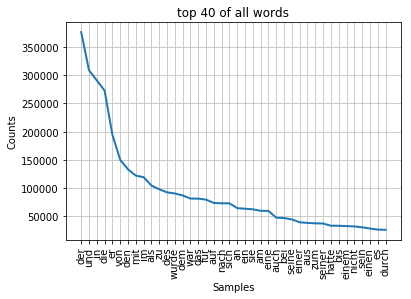

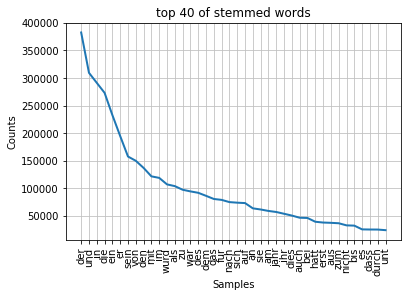

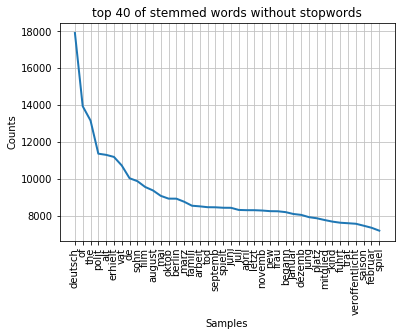

In [60]:
plt.title('top 40 of all words')
fdist.plot(40)
plt.title('top 40 of stemmed words')
fdist_stemmed.plot(40)
plt.title('top 40 of stemmed words without stopwords')
fdist_nostop.plot(40)

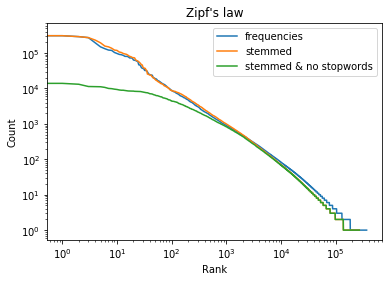

In [62]:
frequencies = []
frequencies_stemmed = []
frequencies_nostop = []
for word, count in fdist.items():
    frequencies.append(count)
for word, count in fdist_stemmed.items():
    frequencies_stemmed.append(count)
for word, count in fdist_nostop.items():
    frequencies_nostop.append(count)
    
plt.plot(sorted(frequencies, reverse=True))
plt.plot(sorted(frequencies_stemmed, reverse=True))
plt.plot(sorted(frequencies_nostop, reverse=True))
plt.title("Zipf's law")
plt.xlabel('Rank')
plt.xscale('log')
plt.ylabel('Count')
plt.yscale('log')
plt.legend(['frequencies', 'stemmed', 'stemmed & no stopwords'])
plt.show()

# 2) Bag of Words

In [196]:
#create tf-idf doc-term matrix
tfidf_vectorizer = TfidfVectorizer(analyzer='word', min_df=0, binary=True, norm=None, use_idf=False)
doc_term_matrix = tfidf_vectorizer.fit_transform(people['text'])
doc_term_matrix.shape

(10000, 385901)

In [197]:
# find most similar people
doc_schumi = doc_term_matrix[vip[0][0]].toarray()[0]
sim_schumi = []
doc_einstein = doc_term_matrix[vip[1][0]].toarray()[0]
sim_einstein = []
doc_michi = doc_term_matrix[vip[2][0]].toarray()[0]
sim_michi = []

for i, row in people.iterrows(): 
    doc = doc_term_matrix[i].toarray()[0]
    if i != vip[0][0]:
        sim = np.dot(doc_schumi, doc)
        sim_schumi.append((i, sim))
    if i != vip[1][0]:
        sim = np.dot(doc_einstein, doc)
        sim_einstein.append((i, sim))
    if i != vip[2][0]:
        sim = np.dot(doc_michi, doc)
        sim_michi.append((i, sim))

In [198]:
#results
print('Top 10 most similar to Michael Schumacher:')
for i, sim in sorted(sim_schumi, reverse=True, key=lambda pair: pair[1])[:10]:
    print(f' - {people["Name"][i]} ({i}), similarity = {sim}')
print()
print('Top 10 most similar to Albert Einstein:')
for i, sim in sorted(sim_einstein, reverse=True, key=lambda pair: pair[1])[:10]:
    print(f' - {people["Name"][i]} ({i}), similarity = {sim}')
print()
print('Top 10 most similar to Michael Jackson:')
for i, sim in sorted(sim_michi, reverse=True, key=lambda pair: pair[1])[:10]:
    print(f' - {people["Name"][i]} ({i}), similarity = {sim}')

Top 10 most similar to Michael Schumacher:
 - Wallenstein (0), similarity = 815.0
 - Theobald von Bethmann Hollweg (1), similarity = 790.0
 - Fernando Alonso (57), similarity = 779.0
 - Benjamin Franklin (2), similarity = 752.0
 - Florence Nightingale (4), similarity = 730.0
 - Herbert C. Hoover (6), similarity = 716.0
 - Herbert Hoover (7), similarity = 716.0
 - Lewis Hamilton (117), similarity = 714.0
 - Marlon Brando (5), similarity = 712.0
 - George Washington (22), similarity = 711.0

Top 10 most similar to Albert Einstein:
 - Max Liebermann (21), similarity = 631.0
 - Theobald von Bethmann Hollweg (1), similarity = 621.0
 - Benjamin Franklin (2), similarity = 613.0
 - Mahatma Gandhi (13), similarity = 605.0
 - Mohandas Karamchand Gandhi (14), similarity = 605.0
 - Max Planck (116), similarity = 601.0
 - Otto Hahn (56), similarity = 599.0
 - Herbert C. Hoover (6), similarity = 595.0
 - Herbert Hoover (7), similarity = 595.0
 - Florence Nightingale (4), similarity = 581.0

Top 10 m

In [199]:
#text comparison of the most similar people
print(people['text'][3][:600])
print()
idx = sorted(sim_schumi, reverse=True, key=lambda pair: pair[1])[0][0]
print(people['text'][idx][:600])
print()
print(people['text'][215][:600])
print()
idx = sorted(sim_einstein, reverse=True, key=lambda pair: pair[1])[0][0]
print(people['text'][idx][:600])
print()
print(people['text'][1951][:600])
print()
idx = sorted(sim_michi, reverse=True, key=lambda pair: pair[1])[0][0]
print(people['text'][idx][:600])
print()

Vorlage:Infobox Formel-1-Fahrer/Wartung/Alte Parameter Michael Schumacher (* 3. Januar 1969 in Hürth-Hermülheim, Nordrhein-Westfalen) ist ein ehemaliger deutscher Automobilrennfahrer. Schumacher startete von 1991 bis 2006 sowie von 2010 bis 2012 zu insgesamt 307 Großen Preisen der Formel-1-Weltmeisterschaft. Mit sieben Weltmeistertiteln, 91 Siegen, 68 Pole-Positions und 77 schnellsten Rennrunden ist er der erfolgreichste Pilot der Formel-1-Geschichte. Darüber hinaus stand er mit 155 Platzierungen unter den Top drei am häufigsten auf dem Siegerpodest. Nachdem Schumacher 1990 und 1991 in der Spo

Wallenstein, eigentlich Albrecht Wenzel Eusebius von Waldstein, tschechisch Albrecht Václav Eusebius z Valdštejna (* 24. September 1583 in Hermanitz an der Elbe, Böhmen; † 25. Februar 1634 in Eger, Böhmen), war ein böhmischer Feldherr und Politiker. Er war Herzog von Friedland und Sagan, von 1628 bis 1631 als Albrecht VIII. Herzog zu Mecklenburg, Fürst zu Wenden, Graf von Schwerin, Herr von Rost

### Discussion of results
Die Resultate sind nicht sehr sinnvoll und brauchbar. Es wird nur geschaut, wie viele der Wörter sich überschneiden und darauf hat z.B. die Anzahl Wörter im Text allein einen enormen Einfluss, was aber nicht wirklich sinnvoll ist für einen Ähnlichkeitsvergleich.

# 3) Bag of Words without stop words

In [146]:
stopwords

['a',
 'ab',
 'aber',
 'ach',
 'acht',
 'achte',
 'achten',
 'achter',
 'achtes',
 'ag',
 'alle',
 'allein',
 'allem',
 'allen',
 'aller',
 'allerdings',
 'alles',
 'allgemeinen',
 'als',
 'also',
 'am',
 'an',
 'ander',
 'andere',
 'anderem',
 'anderen',
 'anderer',
 'anderes',
 'anderm',
 'andern',
 'anders',
 'au',
 'auch',
 'auf',
 'aus',
 'ausser',
 'außer',
 'ausserdem',
 'außerdem',
 'b',
 'bald',
 'bei',
 'beide',
 'beiden',
 'beim',
 'beispiel',
 'bekannt',
 'bereits',
 'besonders',
 'besser',
 'besten',
 'bin',
 'bis',
 'bisher',
 'bist',
 'c',
 'd',
 'da',
 'dabei',
 'dadurch',
 'dafür',
 'dagegen',
 'daher',
 'dahin',
 'dahinter',
 'damals',
 'damit',
 'danach',
 'daneben',
 'dank',
 'dann',
 'daran',
 'darauf',
 'daraus',
 'darf',
 'darfst',
 'darin',
 'darüber',
 'darum',
 'darunter',
 'das',
 'das',
 'dasein',
 'daselbst',
 'dass',
 'daß',
 'dasselbe',
 'davon',
 'davor',
 'dazu',
 'dazwischen',
 'dein',
 'deine',
 'deinem',
 'deiner',
 'dem',
 'dementsprechend',
 'demge

In [200]:
#create tf-idf doc-term matrix
tfidf_vectorizer = TfidfVectorizer(analyzer='word', min_df=0, binary=True, norm=None, use_idf=False, stop_words=stopwords)
doc_term_matrix = tfidf_vectorizer.fit_transform(people['text'])
doc_term_matrix.shape

(10000, 385357)

In [201]:
# find most similar people
doc_schumi = doc_term_matrix[vip[0][0]].toarray()[0]
sim_schumi = []
doc_einstein = doc_term_matrix[vip[1][0]].toarray()[0]
sim_einstein = []
doc_michi = doc_term_matrix[vip[2][0]].toarray()[0]
sim_michi = []

for i, row in people.iterrows(): 
    doc = doc_term_matrix[i].toarray()[0]
    if i != vip[0][0]:
        sim = np.dot(doc_schumi, doc)
        sim_schumi.append((i, sim))
    if i != vip[1][0]:
        sim = np.dot(doc_einstein, doc)
        sim_einstein.append((i, sim))
    if i != vip[2][0]:
        sim = np.dot(doc_michi, doc)
        sim_michi.append((i, sim))

In [202]:
#results
print('Top 10 most similar to Michael Schumacher:')
for i, sim in sorted(sim_schumi, reverse=True, key=lambda pair: pair[1])[:10]:
    print(f' - {people["Name"][i]} ({i}), similarity = {sim}')
print()
print('Top 10 most similar to Albert Einstein:')
for i, sim in sorted(sim_einstein, reverse=True, key=lambda pair: pair[1])[:10]:
    print(f' - {people["Name"][i]} ({i}), similarity = {sim}')
print()
print('Top 10 most similar to Michael Jackson:')
for i, sim in sorted(sim_michi, reverse=True, key=lambda pair: pair[1])[:10]:
    print(f' - {people["Name"][i]} ({i}), similarity = {sim}')

Top 10 most similar to Michael Schumacher:
 - Fernando Alonso (57), similarity = 565.0
 - Wallenstein (0), similarity = 534.0
 - Theobald von Bethmann Hollweg (1), similarity = 508.0
 - Lewis Hamilton (117), similarity = 505.0
 - Benjamin Franklin (2), similarity = 471.0
 - Florence Nightingale (4), similarity = 470.0
 - Herbert C. Hoover (6), similarity = 469.0
 - Herbert Hoover (7), similarity = 469.0
 - Marlon Brando (5), similarity = 467.0
 - Sebastian Vettel (172), similarity = 457.0

Top 10 most similar to Albert Einstein:
 - Max Liebermann (21), similarity = 426.0
 - Otto Hahn (56), similarity = 424.0
 - Theobald von Bethmann Hollweg (1), similarity = 411.0
 - Max Planck (116), similarity = 407.0
 - Benjamin Franklin (2), similarity = 404.0
 - Herbert C. Hoover (6), similarity = 401.0
 - Herbert Hoover (7), similarity = 401.0
 - Mahatma Gandhi (13), similarity = 401.0
 - Mohandas Karamchand Gandhi (14), similarity = 401.0
 - Alma Mahler-Werfel (24), similarity = 380.0

Top 10 mo

In [203]:
#text comparison of the most similar people
print(people['text'][3][:600])
print()
idx = sorted(sim_schumi, reverse=True, key=lambda pair: pair[1])[0][0]
print(people['text'][idx][:600])
print()
print(people['text'][215][:600])
print()
idx = sorted(sim_einstein, reverse=True, key=lambda pair: pair[1])[0][0]
print(people['text'][idx][:600])
print()
print(people['text'][1951][:600])
print()
idx = sorted(sim_michi, reverse=True, key=lambda pair: pair[1])[0][0]
print(people['text'][idx][:600])
print()

Vorlage:Infobox Formel-1-Fahrer/Wartung/Alte Parameter Michael Schumacher (* 3. Januar 1969 in Hürth-Hermülheim, Nordrhein-Westfalen) ist ein ehemaliger deutscher Automobilrennfahrer. Schumacher startete von 1991 bis 2006 sowie von 2010 bis 2012 zu insgesamt 307 Großen Preisen der Formel-1-Weltmeisterschaft. Mit sieben Weltmeistertiteln, 91 Siegen, 68 Pole-Positions und 77 schnellsten Rennrunden ist er der erfolgreichste Pilot der Formel-1-Geschichte. Darüber hinaus stand er mit 155 Platzierungen unter den Top drei am häufigsten auf dem Siegerpodest. Nachdem Schumacher 1990 und 1991 in der Spo

Vorlage:Infobox Formel-1-Fahrer/Wartung/Alte Parameter Fernando Alonso Díaz (* 29. Juli 1981 in Oviedo, Asturien) ist ein spanischer Automobilrennfahrer. Er startet seit 2001 in der Formel 1 und gewann dort 2005 und 2006 auf Renault die Weltmeisterschaft. Von 2010 bis 2014 startete Alonso für den italienischen Traditionsrennstall Ferrari, mit dem er 2010, 2012 und 2013 Vizeweltmeister wurde. 200

### Discussion of results
Die Entfernung der Stopwords hilft bereits und verbessert das Resultat. Nun ist beispielsweise nicht mehr Wallenstein als ähnlichste Person zu Michael Schumacher resultiert, sondern Fernando Alonso, also auch ein Rennfahrer. Wallenstein hat einfach einen sehr langen Text, damit viele übereinstimmende Wörter und wurde darum vorhin als so ähnlich angesehen.

# 4a) Term frequency without stop words

In [204]:
#create tf-idf doc-term matrix
tfidf_vectorizer = TfidfVectorizer(analyzer='word', min_df=0, binary=False, norm=None, use_idf=False, stop_words=stopwords)
doc_term_matrix = tfidf_vectorizer.fit_transform(people['text'])
doc_term_matrix.shape

(10000, 385357)

In [205]:
# find most similar people
doc_schumi = doc_term_matrix[vip[0][0]].toarray()[0]
sim_schumi = []
doc_einstein = doc_term_matrix[vip[1][0]].toarray()[0]
sim_einstein = []
doc_michi = doc_term_matrix[vip[2][0]].toarray()[0]
sim_michi = []

for i, row in people.iterrows(): 
    doc = doc_term_matrix[i].toarray()[0]
    if i != vip[0][0]:
        sim = np.dot(doc_schumi, doc)
        sim_schumi.append((i, sim))
    if i != vip[1][0]:
        sim = np.dot(doc_einstein, doc)
        sim_einstein.append((i, sim))
    if i != vip[2][0]:
        sim = np.dot(doc_michi, doc)
        sim_michi.append((i, sim))

In [206]:
#results
print('Top 10 most similar to Michael Schumacher:')
for i, sim in sorted(sim_schumi, reverse=True, key=lambda pair: pair[1])[:10]:
    print(f' - {people["Name"][i]} ({i}), similarity = {sim}')
print()
print('Top 10 most similar to Albert Einstein:')
for i, sim in sorted(sim_einstein, reverse=True, key=lambda pair: pair[1])[:10]:
    print(f' - {people["Name"][i]} ({i}), similarity = {sim}')
print()
print('Top 10 most similar to Michael Jackson:')
for i, sim in sorted(sim_michi, reverse=True, key=lambda pair: pair[1])[:10]:
    print(f' - {people["Name"][i]} ({i}), similarity = {sim}')

Top 10 most similar to Michael Schumacher:
 - Fernando Alonso (57), similarity = 43633.0
 - Lewis Hamilton (117), similarity = 34804.0
 - Sebastian Vettel (172), similarity = 29382.0
 - Rubens Barrichello (358), similarity = 27660.0
 - Juan Pablo Montoya (329), similarity = 26498.0
 - Kimi Räikkönen (319), similarity = 24348.0
 - Nico Rosberg (699), similarity = 20986.0
 - Jenson Button (514), similarity = 20143.0
 - Ralf Schumacher (1931), similarity = 19183.0
 - Alain Prost (425), similarity = 19092.0

Top 10 most similar to Albert Einstein:
 - Max Planck (116), similarity = 3912.0
 - Theobald von Bethmann Hollweg (1), similarity = 3404.0
 - Otto Hahn (56), similarity = 3385.0
 - Max Liebermann (21), similarity = 3288.0
 - Wilhelm Canaris (15), similarity = 2879.0
 - Wallenstein (0), similarity = 2774.0
 - Wilhelm Solf (34), similarity = 2744.0
 - Herbert C. Hoover (6), similarity = 2719.0
 - Herbert Hoover (7), similarity = 2719.0
 - Johannes Haller (55), similarity = 2667.0

Top 10

In [207]:
#text comparison of the most similar people
print(people['text'][3][:600])
print()
idx = sorted(sim_schumi, reverse=True, key=lambda pair: pair[1])[0][0]
print(people['text'][idx][:600])
print()
print(people['text'][215][:600])
print()
idx = sorted(sim_einstein, reverse=True, key=lambda pair: pair[1])[0][0]
print(people['text'][idx][:600])
print()
print(people['text'][1951][:600])
print()
idx = sorted(sim_michi, reverse=True, key=lambda pair: pair[1])[0][0]
print(people['text'][idx][:600])
print()

Vorlage:Infobox Formel-1-Fahrer/Wartung/Alte Parameter Michael Schumacher (* 3. Januar 1969 in Hürth-Hermülheim, Nordrhein-Westfalen) ist ein ehemaliger deutscher Automobilrennfahrer. Schumacher startete von 1991 bis 2006 sowie von 2010 bis 2012 zu insgesamt 307 Großen Preisen der Formel-1-Weltmeisterschaft. Mit sieben Weltmeistertiteln, 91 Siegen, 68 Pole-Positions und 77 schnellsten Rennrunden ist er der erfolgreichste Pilot der Formel-1-Geschichte. Darüber hinaus stand er mit 155 Platzierungen unter den Top drei am häufigsten auf dem Siegerpodest. Nachdem Schumacher 1990 und 1991 in der Spo

Vorlage:Infobox Formel-1-Fahrer/Wartung/Alte Parameter Fernando Alonso Díaz (* 29. Juli 1981 in Oviedo, Asturien) ist ein spanischer Automobilrennfahrer. Er startet seit 2001 in der Formel 1 und gewann dort 2005 und 2006 auf Renault die Weltmeisterschaft. Von 2010 bis 2014 startete Alonso für den italienischen Traditionsrennstall Ferrari, mit dem er 2010, 2012 und 2013 Vizeweltmeister wurde. 200

### Discussion of results
Anstatt einfach binäre Werte zu verwenden, ob ein gewisses Wort vorkommt oder nicht, wurden hier die Wörter effektiv gezählt. Das macht intuitiv Sinn, wenn Wörter häufiger vorkommen sind sie ja wahrscheinlich auch wichtiger. Es ist deshalb eine erneute Verbesserung der Resultate zu erkennen, insbesondere bei Michael Jackson, dessen Schwester jetzt zuoebrst in der Ähnlchkeitsliste ist. Man muss aber im Hinterkopf behalten, dass immer noch das vorherig genannte Problem besteht mit sehr grossen Texten - mit diesen wird es nämlich mit höherer Wahrscheinlichkeit mehr überschneidungen geben als für kürzere Texte.

# 4b) Term frequency without stop words and with stemming

In [209]:
#extend TfidfVectorizer to also stem the words
class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(TfidfVectorizer, self).build_analyzer()
        return lambda document: (stemmer.stem(word) for word in analyzer(document))

In [210]:
#create tf-idf doc-term matrix - slower than before, stemming takes quite some time...
tfidf_vectorizer = StemmedTfidfVectorizer(analyzer='word', min_df=0, binary=False, norm=None, use_idf=False, stop_words=stopwords)
doc_term_matrix = tfidf_vectorizer.fit_transform(people['text'])
doc_term_matrix.shape

(10000, 284886)

In [211]:
# find most similar people
doc_schumi = doc_term_matrix[vip[0][0]].toarray()[0]
sim_schumi = []
doc_einstein = doc_term_matrix[vip[1][0]].toarray()[0]
sim_einstein = []
doc_michi = doc_term_matrix[vip[2][0]].toarray()[0]
sim_michi = []

for i, row in people.iterrows(): 
    doc = doc_term_matrix[i].toarray()[0]
    if i != vip[0][0]:
        sim = np.dot(doc_schumi, doc)
        sim_schumi.append((i, sim))
    if i != vip[1][0]:
        sim = np.dot(doc_einstein, doc)
        sim_einstein.append((i, sim))
    if i != vip[2][0]:
        sim = np.dot(doc_michi, doc)
        sim_michi.append((i, sim))

In [213]:
#results
print('Top 10 most similar to Michael Schumacher:')
for i, sim in sorted(sim_schumi, reverse=True, key=lambda pair: pair[1])[:10]:
    print(f' - {people["Name"][i]} ({i}), similarity = {sim}')
print()
print('Top 10 most similar to Albert Einstein:')
for i, sim in sorted(sim_einstein, reverse=True, key=lambda pair: pair[1])[:10]:
    print(f' - {people["Name"][i]} ({i}), similarity = {sim}')
print()
print('Top 10 most similar to Michael Jackson:')
for i, sim in sorted(sim_michi, reverse=True, key=lambda pair: pair[1])[:10]:
    print(f' - {people["Name"][i]} ({i}), similarity = {sim}')

Top 10 most similar to Michael Schumacher:
 - Fernando Alonso (57), similarity = 52419.0
 - Lewis Hamilton (117), similarity = 41164.0
 - Sebastian Vettel (172), similarity = 35275.0
 - Rubens Barrichello (358), similarity = 33257.0
 - Juan Pablo Montoya (329), similarity = 31578.0
 - Kimi Räikkönen (319), similarity = 28677.0
 - Jenson Button (514), similarity = 24829.0
 - Nico Rosberg (699), similarity = 24812.0
 - Alain Prost (425), similarity = 23576.0
 - Ralf Schumacher (1931), similarity = 23021.0

Top 10 most similar to Albert Einstein:
 - Max Planck (116), similarity = 5927.0
 - Theobald von Bethmann Hollweg (1), similarity = 5476.0
 - Max Liebermann (21), similarity = 5236.0
 - Otto Hahn (56), similarity = 4813.0
 - Wilhelm Solf (34), similarity = 4583.0
 - Johannes Haller (55), similarity = 4333.0
 - Wallenstein (0), similarity = 4286.0
 - Herbert C. Hoover (6), similarity = 4134.0
 - Herbert Hoover (7), similarity = 4134.0
 - Wilhelm Canaris (15), similarity = 4095.0

Top 10

In [214]:
#text comparison of the most similar people
print(people['text'][3][:600])
print()
idx = sorted(sim_schumi, reverse=True, key=lambda pair: pair[1])[0][0]
print(people['text'][idx][:600])
print()
print(people['text'][215][:600])
print()
idx = sorted(sim_einstein, reverse=True, key=lambda pair: pair[1])[0][0]
print(people['text'][idx][:600])
print()
print(people['text'][1951][:600])
print()
idx = sorted(sim_michi, reverse=True, key=lambda pair: pair[1])[0][0]
print(people['text'][idx][:600])
print()

Vorlage:Infobox Formel-1-Fahrer/Wartung/Alte Parameter Michael Schumacher (* 3. Januar 1969 in Hürth-Hermülheim, Nordrhein-Westfalen) ist ein ehemaliger deutscher Automobilrennfahrer. Schumacher startete von 1991 bis 2006 sowie von 2010 bis 2012 zu insgesamt 307 Großen Preisen der Formel-1-Weltmeisterschaft. Mit sieben Weltmeistertiteln, 91 Siegen, 68 Pole-Positions und 77 schnellsten Rennrunden ist er der erfolgreichste Pilot der Formel-1-Geschichte. Darüber hinaus stand er mit 155 Platzierungen unter den Top drei am häufigsten auf dem Siegerpodest. Nachdem Schumacher 1990 und 1991 in der Spo

Vorlage:Infobox Formel-1-Fahrer/Wartung/Alte Parameter Fernando Alonso Díaz (* 29. Juli 1981 in Oviedo, Asturien) ist ein spanischer Automobilrennfahrer. Er startet seit 2001 in der Formel 1 und gewann dort 2005 und 2006 auf Renault die Weltmeisterschaft. Von 2010 bis 2014 startete Alonso für den italienischen Traditionsrennstall Ferrari, mit dem er 2010, 2012 und 2013 Vizeweltmeister wurde. 200

### Discussion of results
Schwer zu sagen, ob sich das Resultat tatsächlich verbessert hat. Es ist anzunehmen, da Stemming ja die anzahl Features reduziert und sozusagen Redundanzen beseitigt. Eine grosse Verbesserung ist einfach so aber nicht ersichtlich.

# 4c) Term frequency, stopped, stemmed and Cosine Similarity

In [218]:
from sklearn.metrics.pairwise import cosine_similarity
# find most similar people using cosine similarity
# need to reshape because 1d arrays are not supported for cosine_similarity
doc_schumi = doc_term_matrix[vip[0][0]].toarray()[0].reshape(1, -1)
sim_schumi = []
doc_einstein = doc_term_matrix[vip[1][0]].toarray()[0].reshape(1, -1)
sim_einstein = []
doc_michi = doc_term_matrix[vip[2][0]].toarray()[0].reshape(1, -1)
sim_michi = []

for i, row in people.iterrows(): 
    doc = doc_term_matrix[i].toarray()[0].reshape(1, -1)
    if i != vip[0][0]:
        sim = cosine_similarity(doc_schumi, doc)
        sim_schumi.append((i, sim))
    if i != vip[1][0]:
        sim = cosine_similarity(doc_einstein, doc)
        sim_einstein.append((i, sim))
    if i != vip[2][0]:
        sim = cosine_similarity(doc_michi, doc)
        sim_michi.append((i, sim))

In [219]:
#results
print('Top 10 most similar to Michael Schumacher:')
for i, sim in sorted(sim_schumi, reverse=True, key=lambda pair: pair[1])[:10]:
    print(f' - {people["Name"][i]} ({i}), similarity = {sim}')
print()
print('Top 10 most similar to Albert Einstein:')
for i, sim in sorted(sim_einstein, reverse=True, key=lambda pair: pair[1])[:10]:
    print(f' - {people["Name"][i]} ({i}), similarity = {sim}')
print()
print('Top 10 most similar to Michael Jackson:')
for i, sim in sorted(sim_michi, reverse=True, key=lambda pair: pair[1])[:10]:
    print(f' - {people["Name"][i]} ({i}), similarity = {sim}')

Top 10 most similar to Michael Schumacher:
 - Ralf Schumacher (1931), similarity = [[0.79118095]]
 - Rubens Barrichello (358), similarity = [[0.56714579]]
 - Fernando Alonso (57), similarity = [[0.49440667]]
 - Fritz Schumacher (1152), similarity = [[0.47780018]]
 - Jacques Villeneuve (902), similarity = [[0.47728346]]
 - Kimi Räikkönen (319), similarity = [[0.43942596]]
 - David Coulthard (1755), similarity = [[0.4344605]]
 - Jarno Trulli (2823), similarity = [[0.43205887]]
 - Juan Pablo Montoya (329), similarity = [[0.42384319]]
 - Lewis Hamilton (117), similarity = [[0.41932996]]

Top 10 most similar to Albert Einstein:
 - Mileva Marić (6001), similarity = [[0.53251147]]
 - Satyendra Nath Bose (8450), similarity = [[0.44203981]]
 - Max von Laue (5715), similarity = [[0.31920144]]
 - Abraham Pais (4668), similarity = [[0.28357729]]
 - John Archibald Wheeler (5889), similarity = [[0.2727095]]
 - Leó Szilárd (2834), similarity = [[0.2638969]]
 - Max Born (4519), similarity = [[0.261570

In [220]:
#text comparison of the most similar people
print(people['text'][3][:600])
print()
idx = sorted(sim_schumi, reverse=True, key=lambda pair: pair[1])[0][0]
print(people['text'][idx][:600])
print()
print(people['text'][215][:600])
print()
idx = sorted(sim_einstein, reverse=True, key=lambda pair: pair[1])[0][0]
print(people['text'][idx][:600])
print()
print(people['text'][1951][:600])
print()
idx = sorted(sim_michi, reverse=True, key=lambda pair: pair[1])[0][0]
print(people['text'][idx][:600])
print()

Vorlage:Infobox Formel-1-Fahrer/Wartung/Alte Parameter Michael Schumacher (* 3. Januar 1969 in Hürth-Hermülheim, Nordrhein-Westfalen) ist ein ehemaliger deutscher Automobilrennfahrer. Schumacher startete von 1991 bis 2006 sowie von 2010 bis 2012 zu insgesamt 307 Großen Preisen der Formel-1-Weltmeisterschaft. Mit sieben Weltmeistertiteln, 91 Siegen, 68 Pole-Positions und 77 schnellsten Rennrunden ist er der erfolgreichste Pilot der Formel-1-Geschichte. Darüber hinaus stand er mit 155 Platzierungen unter den Top drei am häufigsten auf dem Siegerpodest. Nachdem Schumacher 1990 und 1991 in der Spo

Vorlage:Infobox Formel-1-Fahrer/Wartung/Alte Parameter Vorlage:Infobox DTM-Fahrer/Wartung/Alte Parameter Ralf Schumacher (* 30. Juni 1975 in Hürth-Hermülheim) ist ein ehemaliger deutscher Automobilrennfahrer. Er startete zwischen 1997 und 2007 zu 180 Grand-Prix-Rennen in der Formel 1 und gewann sechs davon. Von 2008 bis 2012 fuhr Schumacher in der DTM für Mercedes-Benz. 1996 wurde er Meister der

### Discussion of results
Die Cosine Similarity zu verwenden hat das Resultat im Hinblick zur vorherigen Aufgabe wieder merkbar verbessert! Es ist jetzt Ralf Schuhmacher, der die grösste Ähnlichkeit zu seinem Bruder aufweist.

# 5) TF-IDF

In [221]:
#create tf-idf doc-term matrix - use idf score now
tfidf_vectorizer = StemmedTfidfVectorizer(analyzer='word', min_df=0, binary=False, norm=None, use_idf=True, stop_words=stopwords)
doc_term_matrix = tfidf_vectorizer.fit_transform(people['text'])
doc_term_matrix.shape

(10000, 284886)

In [222]:
from sklearn.metrics.pairwise import cosine_similarity
# find most similar people using cosine similarity
doc_schumi = doc_term_matrix[vip[0][0]].toarray()[0].reshape(1, -1)
sim_schumi = []
doc_einstein = doc_term_matrix[vip[1][0]].toarray()[0].reshape(1, -1)
sim_einstein = []
doc_michi = doc_term_matrix[vip[2][0]].toarray()[0].reshape(1, -1)
sim_michi = []

for i, row in people.iterrows(): 
    doc = doc_term_matrix[i].toarray()[0].reshape(1, -1)
    if i != vip[0][0]:
        sim = cosine_similarity(doc_schumi, doc)
        sim_schumi.append((i, sim))
    if i != vip[1][0]:
        sim = cosine_similarity(doc_einstein, doc)
        sim_einstein.append((i, sim))
    if i != vip[2][0]:
        sim = cosine_similarity(doc_michi, doc)
        sim_michi.append((i, sim))

In [223]:
#results
print('Top 10 most similar to Michael Schumacher:')
for i, sim in sorted(sim_schumi, reverse=True, key=lambda pair: pair[1])[:10]:
    print(f' - {people["Name"][i]} ({i}), similarity = {sim}')
print()
print('Top 10 most similar to Albert Einstein:')
for i, sim in sorted(sim_einstein, reverse=True, key=lambda pair: pair[1])[:10]:
    print(f' - {people["Name"][i]} ({i}), similarity = {sim}')
print()
print('Top 10 most similar to Michael Jackson:')
for i, sim in sorted(sim_michi, reverse=True, key=lambda pair: pair[1])[:10]:
    print(f' - {people["Name"][i]} ({i}), similarity = {sim}')

Top 10 most similar to Michael Schumacher:
 - Ralf Schumacher (1931), similarity = [[0.78459344]]
 - Fritz Schumacher (1152), similarity = [[0.58787461]]
 - Kurt Schumacher (7498), similarity = [[0.45337665]]
 - Rubens Barrichello (358), similarity = [[0.43070848]]
 - Fernando Alonso (57), similarity = [[0.3621636]]
 - Jacques Villeneuve (902), similarity = [[0.34465185]]
 - David Coulthard (1755), similarity = [[0.31362706]]
 - Lewis Hamilton (117), similarity = [[0.29347912]]
 - Jarno Trulli (2823), similarity = [[0.28368322]]
 - Kimi Räikkönen (319), similarity = [[0.28006618]]

Top 10 most similar to Albert Einstein:
 - Mileva Marić (6001), similarity = [[0.51745992]]
 - Satyendra Nath Bose (8450), similarity = [[0.46921408]]
 - Albert Brooks (8577), similarity = [[0.29752846]]
 - Max von Laue (5715), similarity = [[0.23752506]]
 - John Archibald Wheeler (5889), similarity = [[0.22762242]]
 - Max Born (4519), similarity = [[0.19880105]]
 - Abraham Pais (4668), similarity = [[0.1928

In [224]:
#text comparison of the most similar people
print(people['text'][3][:600])
print()
idx = sorted(sim_schumi, reverse=True, key=lambda pair: pair[1])[0][0]
print(people['text'][idx][:600])
print()
print(people['text'][215][:600])
print()
idx = sorted(sim_einstein, reverse=True, key=lambda pair: pair[1])[0][0]
print(people['text'][idx][:600])
print()
print(people['text'][1951][:600])
print()
idx = sorted(sim_michi, reverse=True, key=lambda pair: pair[1])[0][0]
print(people['text'][idx][:600])
print()

Vorlage:Infobox Formel-1-Fahrer/Wartung/Alte Parameter Michael Schumacher (* 3. Januar 1969 in Hürth-Hermülheim, Nordrhein-Westfalen) ist ein ehemaliger deutscher Automobilrennfahrer. Schumacher startete von 1991 bis 2006 sowie von 2010 bis 2012 zu insgesamt 307 Großen Preisen der Formel-1-Weltmeisterschaft. Mit sieben Weltmeistertiteln, 91 Siegen, 68 Pole-Positions und 77 schnellsten Rennrunden ist er der erfolgreichste Pilot der Formel-1-Geschichte. Darüber hinaus stand er mit 155 Platzierungen unter den Top drei am häufigsten auf dem Siegerpodest. Nachdem Schumacher 1990 und 1991 in der Spo

Vorlage:Infobox Formel-1-Fahrer/Wartung/Alte Parameter Vorlage:Infobox DTM-Fahrer/Wartung/Alte Parameter Ralf Schumacher (* 30. Juni 1975 in Hürth-Hermülheim) ist ein ehemaliger deutscher Automobilrennfahrer. Er startete zwischen 1997 und 2007 zu 180 Grand-Prix-Rennen in der Formel 1 und gewann sechs davon. Von 2008 bis 2012 fuhr Schumacher in der DTM für Mercedes-Benz. 1996 wurde er Meister der

### Discussion of results
Jetzt mit der Verwendung der IDF Gewichtung sind die Ergebnisse auf jeden Fall realitätsnäher und verringern vorallem die Chance, dass sehr lange Texte, u.U. mit sich oft wiederholenden Wörtern, "bevorteilt" werden.

# 6a) LSA with k=100

In [227]:
from sklearn.decomposition import TruncatedSVD
doc_term_matrix = TruncatedSVD(n_components=100).fit_transform(doc_term_matrix)
doc_term_matrix.shape

(10000, 100)

In [232]:
# find most similar people using cosine similarity on reduced dimensionality
doc_schumi = doc_term_matrix[vip[0][0]].reshape(1, -1)
sim_schumi = []
doc_einstein = doc_term_matrix[vip[1][0]].reshape(1, -1)
sim_einstein = []
doc_michi = doc_term_matrix[vip[2][0]].reshape(1, -1).reshape(1, -1)
sim_michi = []

for i, row in people.iterrows(): 
    doc = doc_term_matrix[i].reshape(1, -1)
    if i != vip[0][0]:
        sim = cosine_similarity(doc_schumi, doc)
        sim_schumi.append((i, sim))
    if i != vip[1][0]:
        sim = cosine_similarity(doc_einstein, doc)
        sim_einstein.append((i, sim))
    if i != vip[2][0]:
        sim = cosine_similarity(doc_michi, doc)
        sim_michi.append((i, sim))

In [233]:
#results
print('Top 10 most similar to Michael Schumacher:')
for i, sim in sorted(sim_schumi, reverse=True, key=lambda pair: pair[1])[:10]:
    print(f' - {people["Name"][i]} ({i}), similarity = {sim}')
print()
print('Top 10 most similar to Albert Einstein:')
for i, sim in sorted(sim_einstein, reverse=True, key=lambda pair: pair[1])[:10]:
    print(f' - {people["Name"][i]} ({i}), similarity = {sim}')
print()
print('Top 10 most similar to Michael Jackson:')
for i, sim in sorted(sim_michi, reverse=True, key=lambda pair: pair[1])[:10]:
    print(f' - {people["Name"][i]} ({i}), similarity = {sim}')

Top 10 most similar to Michael Schumacher:
 - Ralf Schumacher (1931), similarity = [[0.97980683]]
 - Mika Häkkinen (9918), similarity = [[0.88814448]]
 - Fritz Schumacher (1152), similarity = [[0.87822439]]
 - Kurt Schumacher (7498), similarity = [[0.8367765]]
 - Enzo Ferrari (9877), similarity = [[0.82653837]]
 - Wolfgang Graf Berghe von Trips (4065), similarity = [[0.76366007]]
 - Rubens Barrichello (358), similarity = [[0.75765998]]
 - Jacques Villeneuve (902), similarity = [[0.73140725]]
 - Heinz-Harald Frentzen (1248), similarity = [[0.72359433]]
 - David Coulthard (1755), similarity = [[0.6779449]]

Top 10 most similar to Albert Einstein:
 - Alfred Landé (2729), similarity = [[0.95895738]]
 - Walther Bothe (2761), similarity = [[0.94362201]]
 - Peter Debye (5896), similarity = [[0.93669712]]
 - Wolfgang Pauli (1365), similarity = [[0.93308417]]
 - Werner Heisenberg (1348), similarity = [[0.93203977]]
 - Jakob Johann von Uexküll (4180), similarity = [[0.93196651]]
 - Philipp Lenar

In [234]:
#text comparison of the most similar people
print(people['text'][3][:600])
print()
idx = sorted(sim_schumi, reverse=True, key=lambda pair: pair[1])[0][0]
print(people['text'][idx][:600])
print()
print(people['text'][215][:600])
print()
idx = sorted(sim_einstein, reverse=True, key=lambda pair: pair[1])[0][0]
print(people['text'][idx][:600])
print()
print(people['text'][1951][:600])
print()
idx = sorted(sim_michi, reverse=True, key=lambda pair: pair[1])[0][0]
print(people['text'][idx][:600])
print()

Vorlage:Infobox Formel-1-Fahrer/Wartung/Alte Parameter Michael Schumacher (* 3. Januar 1969 in Hürth-Hermülheim, Nordrhein-Westfalen) ist ein ehemaliger deutscher Automobilrennfahrer. Schumacher startete von 1991 bis 2006 sowie von 2010 bis 2012 zu insgesamt 307 Großen Preisen der Formel-1-Weltmeisterschaft. Mit sieben Weltmeistertiteln, 91 Siegen, 68 Pole-Positions und 77 schnellsten Rennrunden ist er der erfolgreichste Pilot der Formel-1-Geschichte. Darüber hinaus stand er mit 155 Platzierungen unter den Top drei am häufigsten auf dem Siegerpodest. Nachdem Schumacher 1990 und 1991 in der Spo

Vorlage:Infobox Formel-1-Fahrer/Wartung/Alte Parameter Vorlage:Infobox DTM-Fahrer/Wartung/Alte Parameter Ralf Schumacher (* 30. Juni 1975 in Hürth-Hermülheim) ist ein ehemaliger deutscher Automobilrennfahrer. Er startete zwischen 1997 und 2007 zu 180 Grand-Prix-Rennen in der Formel 1 und gewann sechs davon. Von 2008 bis 2012 fuhr Schumacher in der DTM für Mercedes-Benz. 1996 wurde er Meister der

# 6b) LSA with k=500

In [236]:
#create tf-idf doc-term matrix with LSA
tfidf_vectorizer = StemmedTfidfVectorizer(analyzer='word', min_df=0, binary=False, norm=None, use_idf=True, stop_words=stopwords)
doc_term_matrix = tfidf_vectorizer.fit_transform(people['text'])
doc_term_matrix = TruncatedSVD(n_components=500).fit_transform(doc_term_matrix)
doc_term_matrix.shape

(10000, 500)

In [237]:
# find most similar people using cosine similarity on reduced dimensionality
doc_schumi = doc_term_matrix[vip[0][0]].reshape(1, -1)
sim_schumi = []
doc_einstein = doc_term_matrix[vip[1][0]].reshape(1, -1)
sim_einstein = []
doc_michi = doc_term_matrix[vip[2][0]].reshape(1, -1).reshape(1, -1)
sim_michi = []

for i, row in people.iterrows(): 
    doc = doc_term_matrix[i].reshape(1, -1)
    if i != vip[0][0]:
        sim = cosine_similarity(doc_schumi, doc)
        sim_schumi.append((i, sim))
    if i != vip[1][0]:
        sim = cosine_similarity(doc_einstein, doc)
        sim_einstein.append((i, sim))
    if i != vip[2][0]:
        sim = cosine_similarity(doc_michi, doc)
        sim_michi.append((i, sim))

In [238]:
#results
print('Top 10 most similar to Michael Schumacher:')
for i, sim in sorted(sim_schumi, reverse=True, key=lambda pair: pair[1])[:10]:
    print(f' - {people["Name"][i]} ({i}), similarity = {sim}')
print()
print('Top 10 most similar to Albert Einstein:')
for i, sim in sorted(sim_einstein, reverse=True, key=lambda pair: pair[1])[:10]:
    print(f' - {people["Name"][i]} ({i}), similarity = {sim}')
print()
print('Top 10 most similar to Michael Jackson:')
for i, sim in sorted(sim_michi, reverse=True, key=lambda pair: pair[1])[:10]:
    print(f' - {people["Name"][i]} ({i}), similarity = {sim}')

Top 10 most similar to Michael Schumacher:
 - Ralf Schumacher (1931), similarity = [[0.95968304]]
 - Fritz Schumacher (1152), similarity = [[0.81762438]]
 - Kurt Schumacher (7498), similarity = [[0.77055461]]
 - Mika Häkkinen (9918), similarity = [[0.71949529]]
 - Jacques Villeneuve (902), similarity = [[0.63731701]]
 - Wolfgang Graf Berghe von Trips (4065), similarity = [[0.59082078]]
 - Alberto Ascari (4981), similarity = [[0.58617037]]
 - David Coulthard (1755), similarity = [[0.57662029]]
 - Heinz-Harald Frentzen (1248), similarity = [[0.57556003]]
 - Jarno Trulli (2823), similarity = [[0.57541569]]

Top 10 most similar to Albert Einstein:
 - Mileva Marić (6001), similarity = [[0.94513997]]
 - Satyendra Nath Bose (8450), similarity = [[0.92394348]]
 - John Archibald Wheeler (5889), similarity = [[0.83088396]]
 - Abraham Pais (4668), similarity = [[0.77848933]]
 - Kip Thorne (8325), similarity = [[0.69482714]]
 - Leó Szilárd (2834), similarity = [[0.6942366]]
 - Hermann Weyl (5560),

In [239]:
#text comparison of the most similar people
print(people['text'][3][:600])
print()
idx = sorted(sim_schumi, reverse=True, key=lambda pair: pair[1])[0][0]
print(people['text'][idx][:600])
print()
print(people['text'][215][:600])
print()
idx = sorted(sim_einstein, reverse=True, key=lambda pair: pair[1])[0][0]
print(people['text'][idx][:600])
print()
print(people['text'][1951][:600])
print()
idx = sorted(sim_michi, reverse=True, key=lambda pair: pair[1])[0][0]
print(people['text'][idx][:600])
print()

Vorlage:Infobox Formel-1-Fahrer/Wartung/Alte Parameter Michael Schumacher (* 3. Januar 1969 in Hürth-Hermülheim, Nordrhein-Westfalen) ist ein ehemaliger deutscher Automobilrennfahrer. Schumacher startete von 1991 bis 2006 sowie von 2010 bis 2012 zu insgesamt 307 Großen Preisen der Formel-1-Weltmeisterschaft. Mit sieben Weltmeistertiteln, 91 Siegen, 68 Pole-Positions und 77 schnellsten Rennrunden ist er der erfolgreichste Pilot der Formel-1-Geschichte. Darüber hinaus stand er mit 155 Platzierungen unter den Top drei am häufigsten auf dem Siegerpodest. Nachdem Schumacher 1990 und 1991 in der Spo

Vorlage:Infobox Formel-1-Fahrer/Wartung/Alte Parameter Vorlage:Infobox DTM-Fahrer/Wartung/Alte Parameter Ralf Schumacher (* 30. Juni 1975 in Hürth-Hermülheim) ist ein ehemaliger deutscher Automobilrennfahrer. Er startete zwischen 1997 und 2007 zu 180 Grand-Prix-Rennen in der Formel 1 und gewann sechs davon. Von 2008 bis 2012 fuhr Schumacher in der DTM für Mercedes-Benz. 1996 wurde er Meister der

# 6c) LSA with k=1000

In [240]:
#create tf-idf doc-term matrix with LSA
tfidf_vectorizer = StemmedTfidfVectorizer(analyzer='word', min_df=0, binary=False, norm=None, use_idf=True, stop_words=stopwords)
doc_term_matrix = tfidf_vectorizer.fit_transform(people['text'])
doc_term_matrix = TruncatedSVD(n_components=1000).fit_transform(doc_term_matrix)
doc_term_matrix.shape

(10000, 1000)

In [241]:
# find most similar people using cosine similarity on reduced dimensionality
doc_schumi = doc_term_matrix[vip[0][0]].reshape(1, -1)
sim_schumi = []
doc_einstein = doc_term_matrix[vip[1][0]].reshape(1, -1)
sim_einstein = []
doc_michi = doc_term_matrix[vip[2][0]].reshape(1, -1).reshape(1, -1)
sim_michi = []

for i, row in people.iterrows(): 
    doc = doc_term_matrix[i].reshape(1, -1)
    if i != vip[0][0]:
        sim = cosine_similarity(doc_schumi, doc)
        sim_schumi.append((i, sim))
    if i != vip[1][0]:
        sim = cosine_similarity(doc_einstein, doc)
        sim_einstein.append((i, sim))
    if i != vip[2][0]:
        sim = cosine_similarity(doc_michi, doc)
        sim_michi.append((i, sim))

In [242]:
#results
print('Top 10 most similar to Michael Schumacher:')
for i, sim in sorted(sim_schumi, reverse=True, key=lambda pair: pair[1])[:10]:
    print(f' - {people["Name"][i]} ({i}), similarity = {sim}')
print()
print('Top 10 most similar to Albert Einstein:')
for i, sim in sorted(sim_einstein, reverse=True, key=lambda pair: pair[1])[:10]:
    print(f' - {people["Name"][i]} ({i}), similarity = {sim}')
print()
print('Top 10 most similar to Michael Jackson:')
for i, sim in sorted(sim_michi, reverse=True, key=lambda pair: pair[1])[:10]:
    print(f' - {people["Name"][i]} ({i}), similarity = {sim}')

Top 10 most similar to Michael Schumacher:
 - Ralf Schumacher (1931), similarity = [[0.94771777]]
 - Fritz Schumacher (1152), similarity = [[0.78917481]]
 - Kurt Schumacher (7498), similarity = [[0.75179566]]
 - Mika Häkkinen (9918), similarity = [[0.66438178]]
 - Jarno Trulli (2823), similarity = [[0.52801013]]
 - Alberto Ascari (4981), similarity = [[0.51361792]]
 - Enzo Ferrari (9877), similarity = [[0.47347914]]
 - Wolfgang Graf Berghe von Trips (4065), similarity = [[0.46361807]]
 - David Coulthard (1755), similarity = [[0.46214617]]
 - Juan Manuel Fangio (4730), similarity = [[0.46153708]]

Top 10 most similar to Albert Einstein:
 - Mileva Marić (6001), similarity = [[0.940606]]
 - Satyendra Nath Bose (8450), similarity = [[0.92560772]]
 - John Archibald Wheeler (5889), similarity = [[0.75206541]]
 - Albert Brooks (8577), similarity = [[0.62467103]]
 - Abraham Pais (4668), similarity = [[0.60845592]]
 - Kip Thorne (8325), similarity = [[0.55355571]]
 - Leó Szilárd (2834), similar

In [243]:
#text comparison of the most similar people
print(people['text'][3][:600])
print()
idx = sorted(sim_schumi, reverse=True, key=lambda pair: pair[1])[0][0]
print(people['text'][idx][:600])
print()
print(people['text'][215][:600])
print()
idx = sorted(sim_einstein, reverse=True, key=lambda pair: pair[1])[0][0]
print(people['text'][idx][:600])
print()
print(people['text'][1951][:600])
print()
idx = sorted(sim_michi, reverse=True, key=lambda pair: pair[1])[0][0]
print(people['text'][idx][:600])
print()

Vorlage:Infobox Formel-1-Fahrer/Wartung/Alte Parameter Michael Schumacher (* 3. Januar 1969 in Hürth-Hermülheim, Nordrhein-Westfalen) ist ein ehemaliger deutscher Automobilrennfahrer. Schumacher startete von 1991 bis 2006 sowie von 2010 bis 2012 zu insgesamt 307 Großen Preisen der Formel-1-Weltmeisterschaft. Mit sieben Weltmeistertiteln, 91 Siegen, 68 Pole-Positions und 77 schnellsten Rennrunden ist er der erfolgreichste Pilot der Formel-1-Geschichte. Darüber hinaus stand er mit 155 Platzierungen unter den Top drei am häufigsten auf dem Siegerpodest. Nachdem Schumacher 1990 und 1991 in der Spo

Vorlage:Infobox Formel-1-Fahrer/Wartung/Alte Parameter Vorlage:Infobox DTM-Fahrer/Wartung/Alte Parameter Ralf Schumacher (* 30. Juni 1975 in Hürth-Hermülheim) ist ein ehemaliger deutscher Automobilrennfahrer. Er startete zwischen 1997 und 2007 zu 180 Grand-Prix-Rennen in der Formel 1 und gewann sechs davon. Von 2008 bis 2012 fuhr Schumacher in der DTM für Mercedes-Benz. 1996 wurde er Meister der

### Discussion of results
Die Verwendung von LSA mit verschiedener Anzahl Komponenten hat das Resultat merkbar beeinflusst. Wenn z.B. nur die wichtigsen 100 Komponenten betrachtet werden, ist Nicki Minaj die ähnlichste Person zu Michael Jackson - definitiv keine falsche Aussage, beide Personen sind Berühmtheiten aus der Musikindustrie. Wird die Anzahl Komponenten erhöt, entstehen aber wieder andere Resultate, bei k=500 wird z.B. George Jackson als ähnlichste Person mit Michael Jackson berechnet, was (zumindest intuitiv nach meinem Wissen) weniger sinn ergibt. Wie auch immer, mit der Wahl der Anhzahl zu beachtender Komponenten kann beliebig ins Detail gegangen werden, je nach Granularität des Personenvergleichs, die man will.